## 🔹 Data Loading & Overview

## 📂 Dataset Source

This dataset is provided by the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/bank+marketing).

It contains data on a Portuguese bank’s telemarketing campaigns aimed at convincing clients to subscribe to a term deposit.

- **Records**: 41,188 rows  
- **Features**: 20 input variables + 1 output variable  
- **File Used**: `bank-additional-full.csv` (from ZIP archive)

📌 **Target Variable**:  
`y` – whether the client subscribed to a term deposit (`yes` / `no`)

## 🔹 Data Cleaning & Preprocessing

In [1]:
# 📥 2. Load Libraries & Data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Plotting config
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

# Load sample data
df = pd.read_csv("bank-additional-full.csv" , sep=';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


## 🔹 Exploratory Data Analysis (EDA)

In [2]:
# 🧼 3. Data Cleaning & Overview
print("\nData Info:")
df.info()

print("\nMissing Values:")
print(df.isnull().sum())

print("\nBasic Statistics:")
print(df.describe())


Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   411

In [3]:
# ✅ Rename columns for clarity
df = df.rename(columns={
    'y': 'term_subscription',
    'poutcome': 'previous_outcome'
})


## 🔹 Feature Engineering

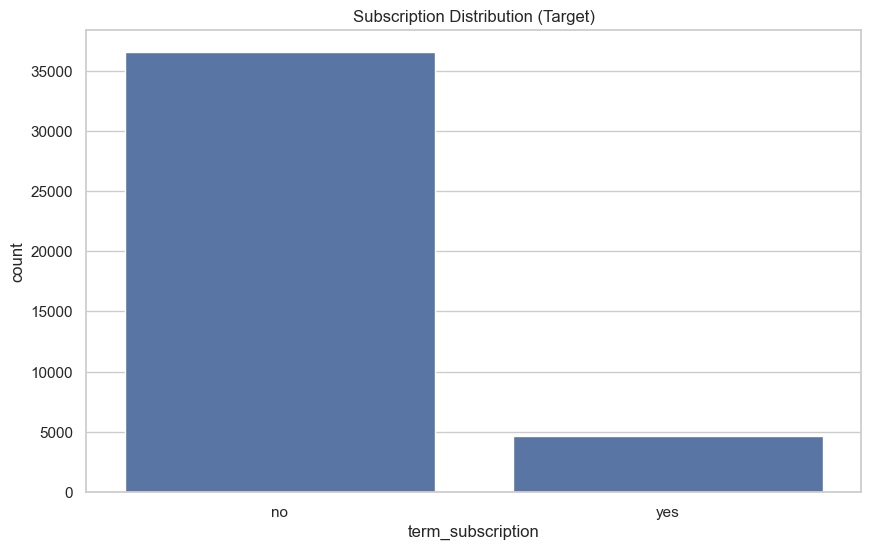

In [4]:
# 🎯 4. Target Variable Distribution
sns.countplot(x='term_subscription', data=df)
plt.title("Subscription Distribution (Target)")
plt.show()

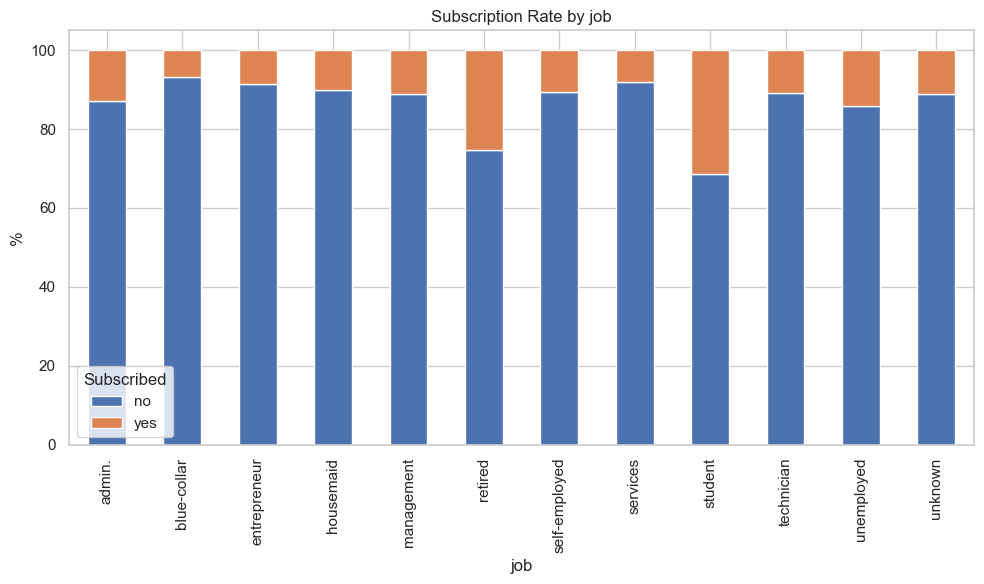

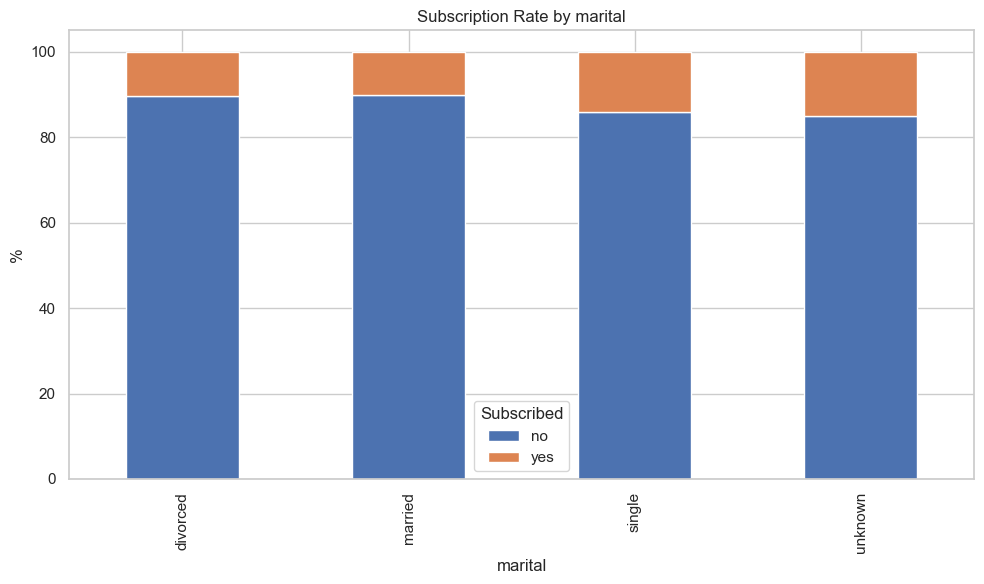

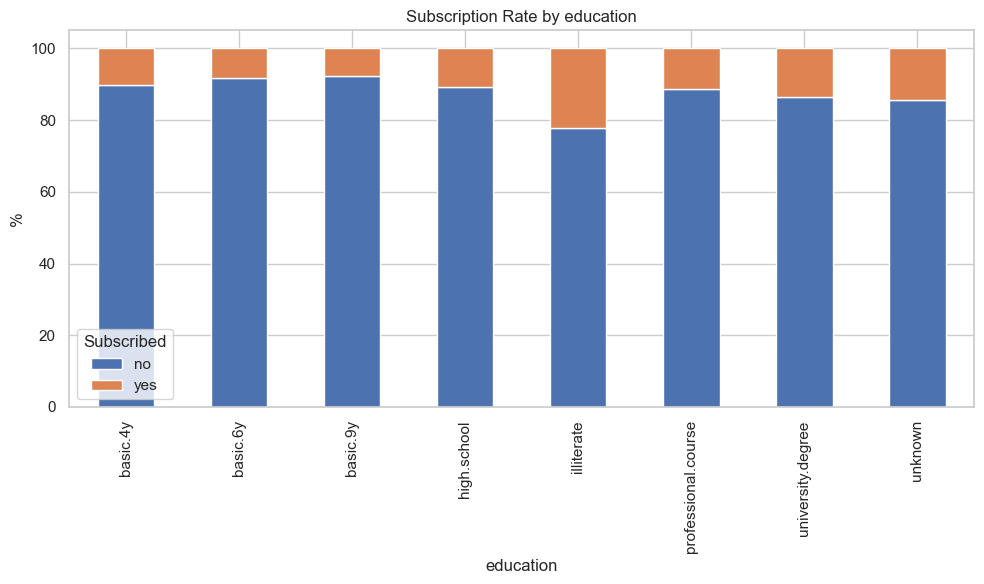

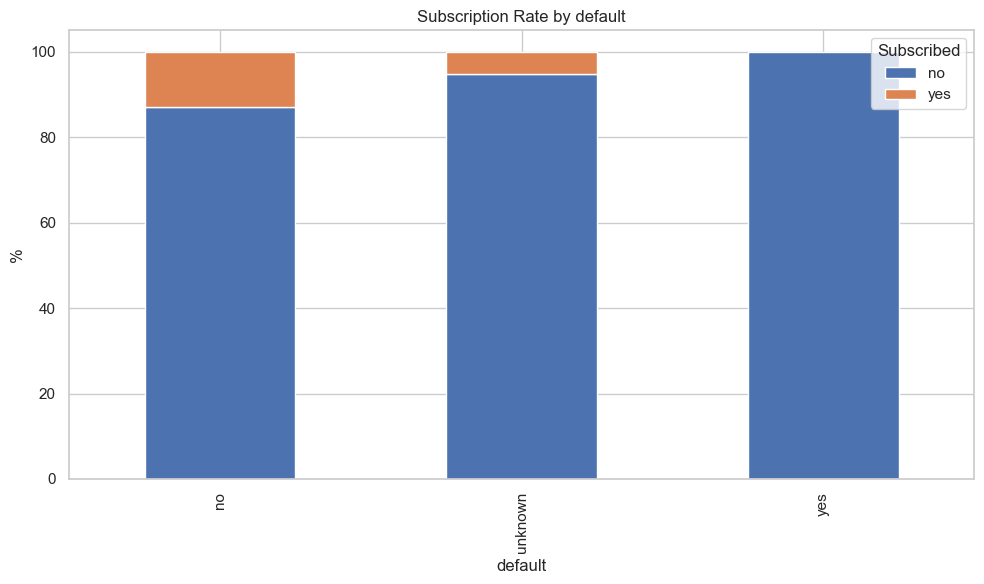

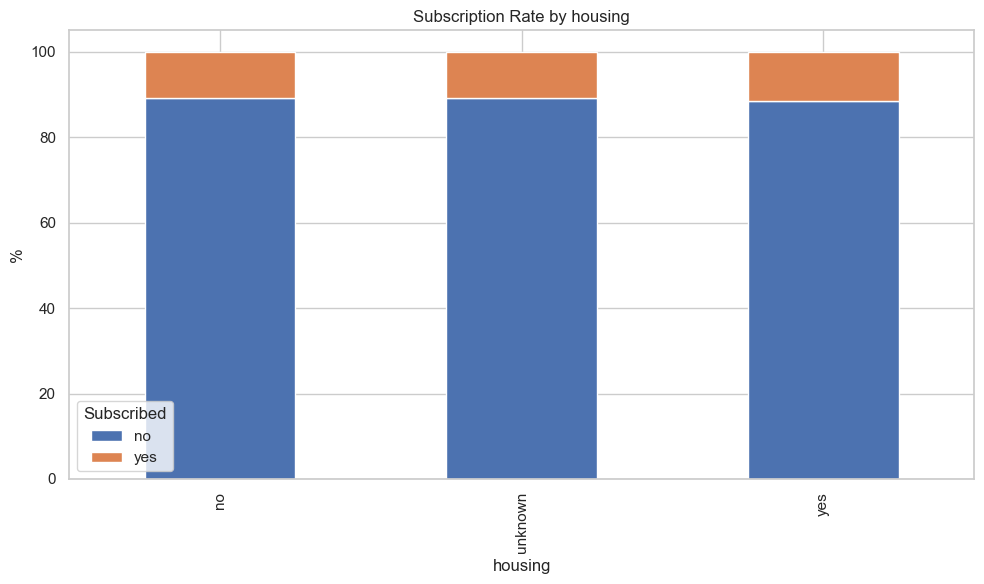

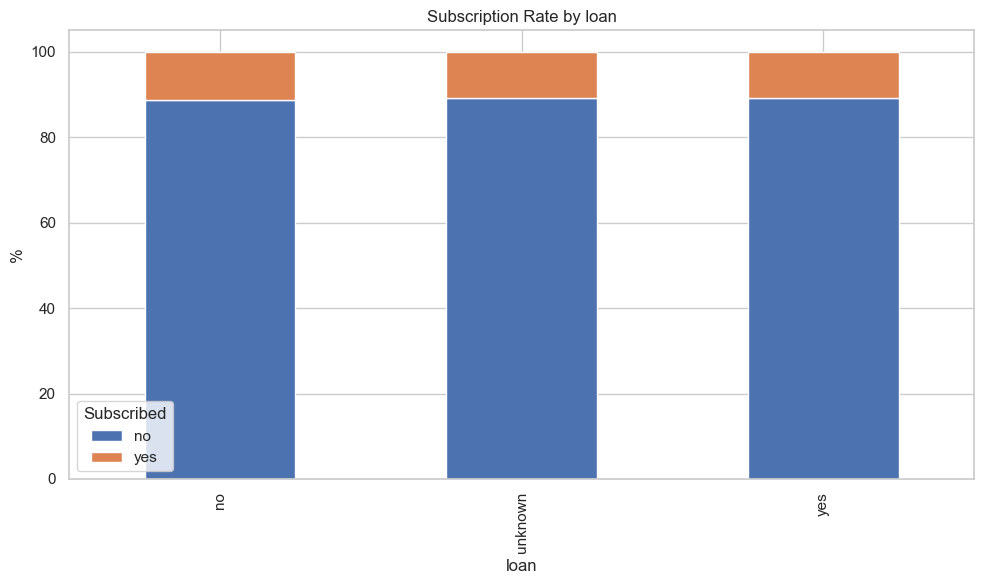

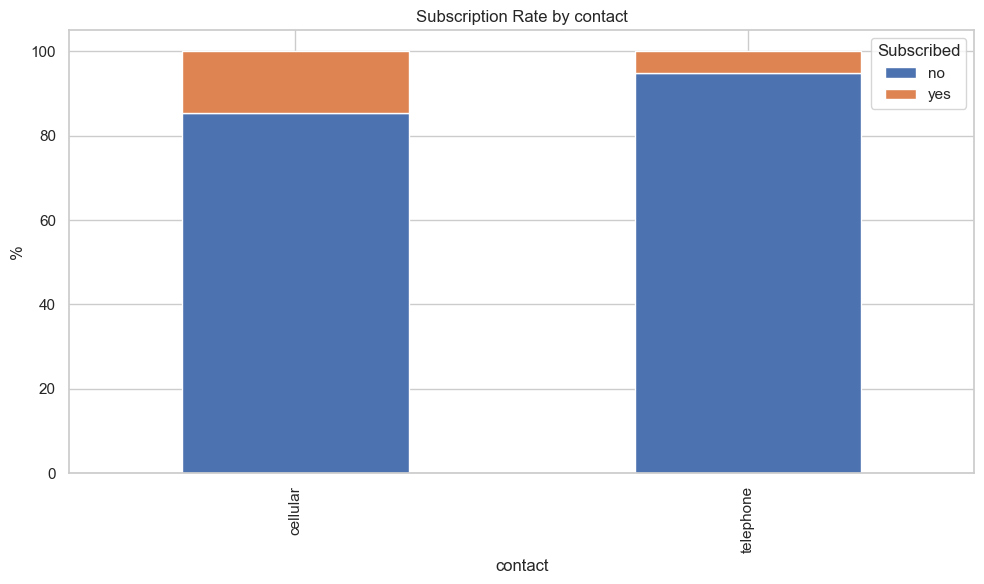

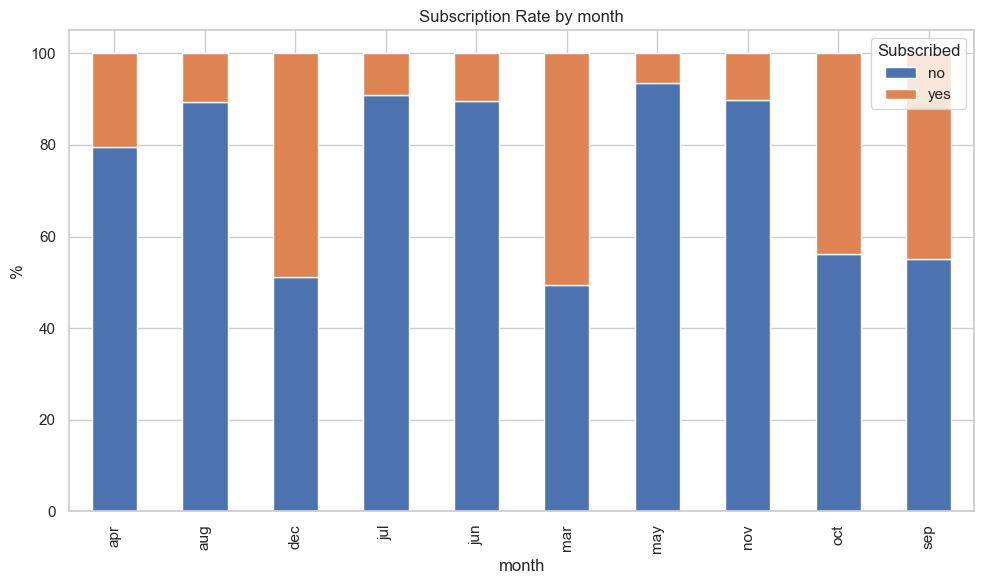

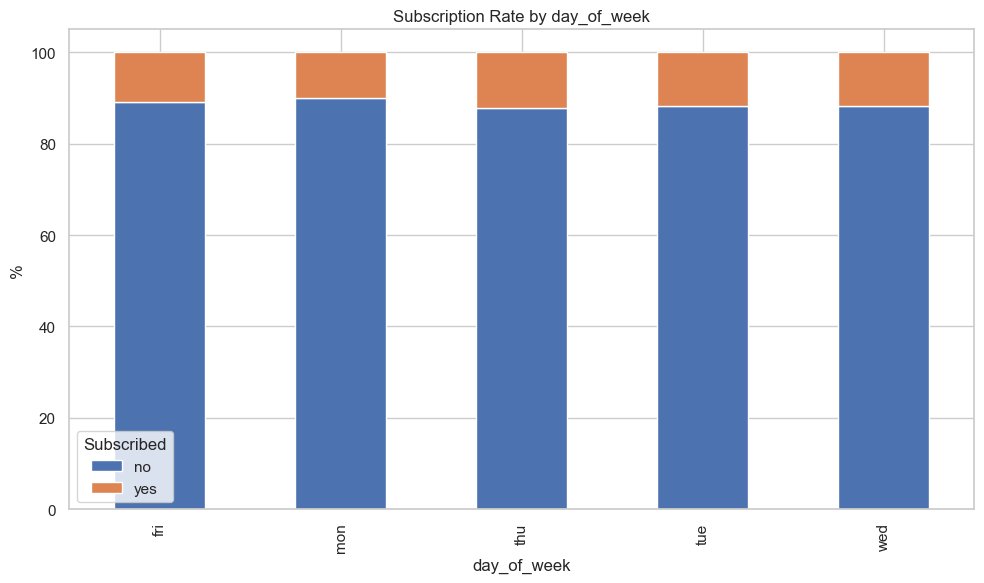

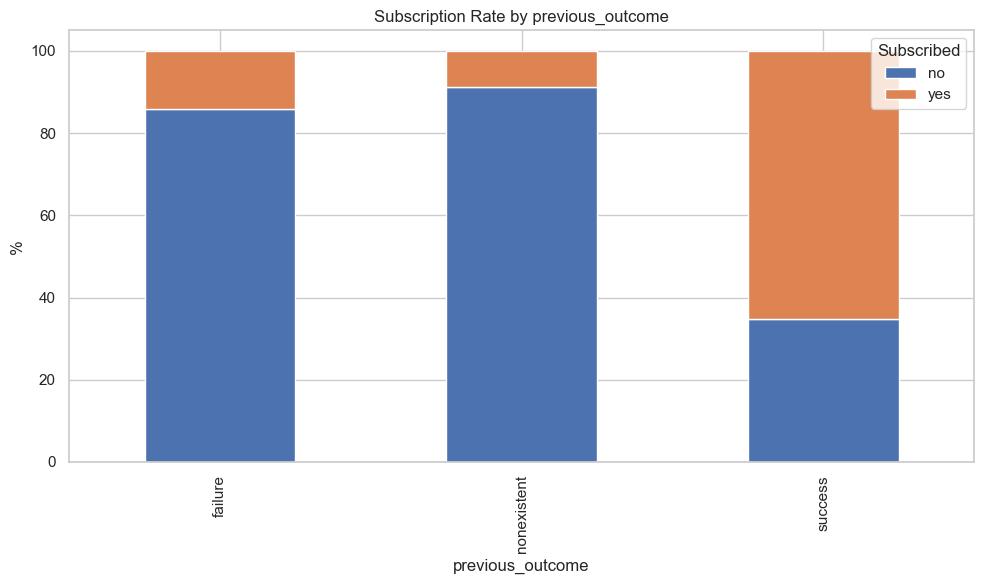

In [5]:
# 🔍 5. Subscription Rate by Category Features
cat_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'previous_outcome']

for col in cat_features:
    ct = pd.crosstab(df[col], df['term_subscription'], normalize='index') * 100
    ct = ct.round(1)
    ct.plot(kind='bar', stacked=True)
    plt.title(f"Subscription Rate by {col}")
    plt.ylabel('%')
    plt.legend(title='Subscribed')
    plt.tight_layout()
    plt.show()

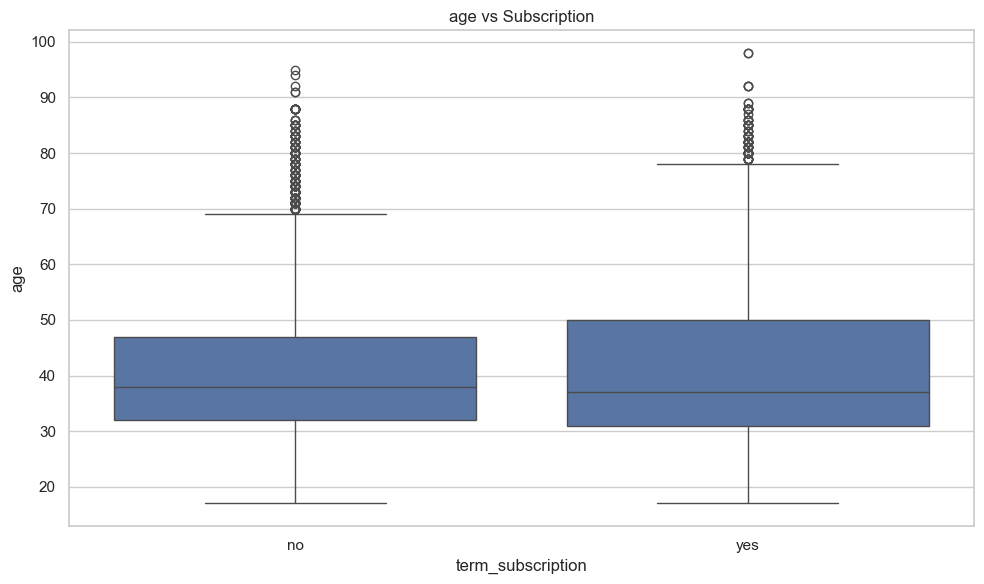

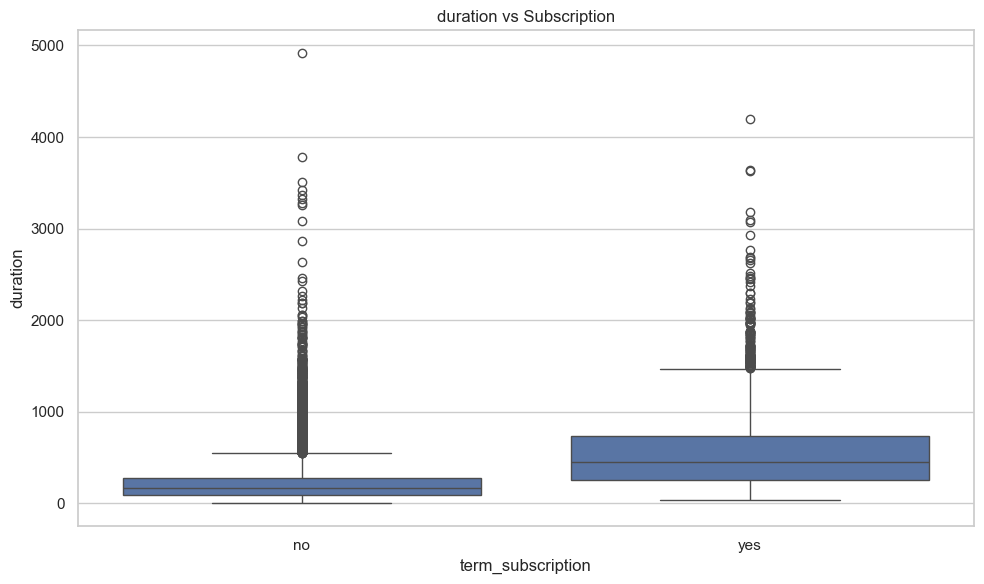

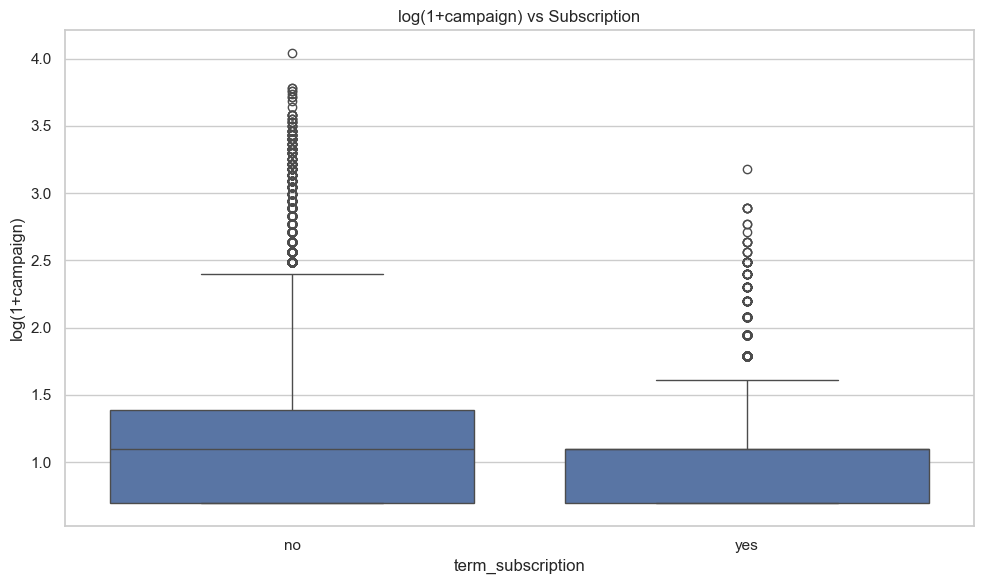

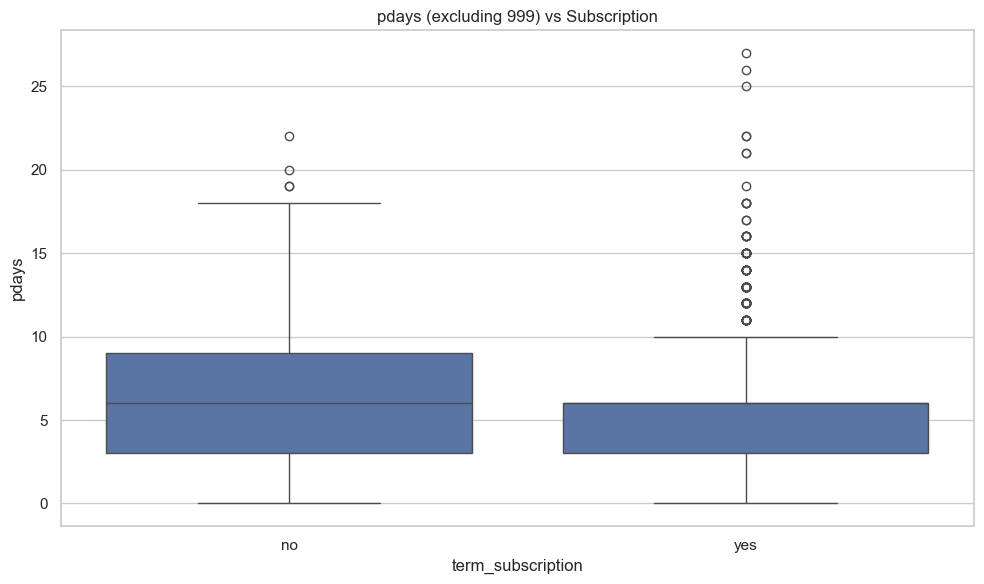

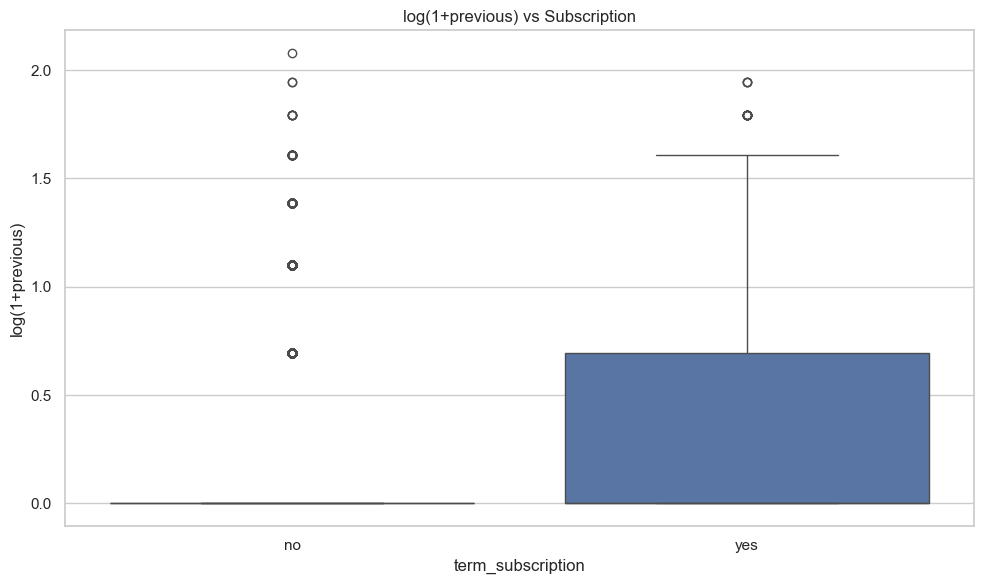

In [6]:
# 📊 6. Numerical Analysis 

num_cols = ['age', 'duration', 'campaign', 'pdays', 'previous']

for col in num_cols:
    plt.figure()

    if col == 'pdays':
        # Remove 999 values which means "never contacted before"
        sns.boxplot(x='term_subscription', y=col, data=df[df['pdays'] != 999])
        plt.title(f"{col} (excluding 999) vs Subscription")
    
    elif col in ['campaign', 'previous']:
        # Log scale for skewed data
        sns.boxplot(x='term_subscription', y=np.log1p(df[col]), data=df)
        plt.title(f"log(1+{col}) vs Subscription")
        plt.ylabel(f"log(1+{col})")

    else:
        sns.boxplot(x='term_subscription', y=col, data=df)
        plt.title(f"{col} vs Subscription")

    plt.tight_layout()
    plt.show()

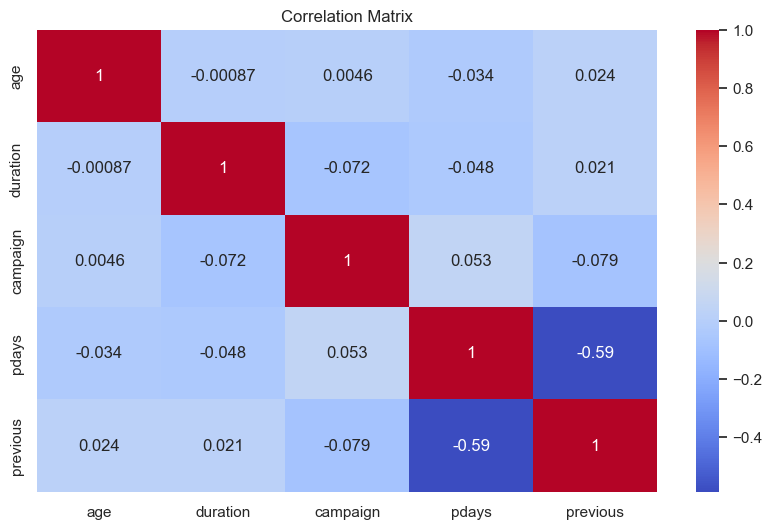

In [7]:
# 📌 7. Correlation Heatmap (Numerical)
corr = df[num_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

## 🔹 Business Insights & Conclusion

After analyzing the bank's direct marketing campaign data, the following key insights were derived:

### 📌 Key Business Insights:

- **Contact Method Matters**: Clients contacted via **cellular phones** had a notably **higher subscription rate** compared to those contacted via traditional telephone lines.
- **Contact Month Matters**: Campaigns conducted in months like **March**, **September**, **October**, and **December** had higher subscription rates.
- **Previous Campaign Outcome is Crucial**: Clients who previously subscribed or had a successful past contact were **significantly more likely** to subscribe again.
- **Call Duration = Strong Indicator**: Longer calls generally resulted in successful conversions — indicating that **more engaged conversations** increase the chances of subscription.
- **Client Profile Impact**:
  - **Education**: Clients with no formal education (illiterate) had the highest subscription rate; those with higher education (university/professional courses) showed moderate rates.
  - **Age**: Middle-aged clients were more likely to subscribe compared to younger or older individuals.
  - **Job**: Retired, students, and unemployed clients had the highest subscription rates.
  - **Marital Status**: Single clients were more likely to subscribe than married or divorced ones.
- **Loan Status**: Having a housing or personal loan showed no clear impact on subscription likelihood.

---

### 🧭 Business Recommendations:

- **Prioritize cellular contact methods** for better conversion.
- **Focus future campaigns** on specific months and previously engaged customers to increase efficiency.
- **Train agents** to maintain longer and more informative calls, especially with promising client segments.
- **Segment marketing strategy** based on education, job, and loan status for better targeting.
- **Use these patterns** to develop a predictive model (e.g., Logistic Regression or Decision Trees) to assist in campaign planning.